In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [11]:
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Handle the case where _create_unverified_context is not available
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [12]:
# Load and preprocess data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [19]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [20]:
# Build model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
# Train model
history = model.fit(x_train, y_train_cat, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.4469 - loss: 1.5333 - val_accuracy: 0.5320 - val_loss: 1.3053
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.5920 - loss: 1.1603 - val_accuracy: 0.6214 - val_loss: 1.0905
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - accuracy: 0.6434 - loss: 1.0192 - val_accuracy: 0.6452 - val_loss: 1.0193
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.6751 - loss: 0.9273 - val_accuracy: 0.6486 - val_loss: 1.0042
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.6993 - loss: 0.8605 - val_accuracy: 0.6692 - val_loss: 0.9574
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.7250 - loss: 0.7934 - val_accuracy: 0.6730 - val_loss: 0.9624
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 15ms/step - accuracy: 0.7412 - loss: 0.7400 - val_accuracy: 0.6771 - val_loss: 0.9661
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.7600 -

In [23]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6760 - loss: 1.0348
Test Accuracy: 0.6760


In [24]:
# Predict
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test.flatten()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [25]:
# Classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


Classification Report:

              precision    recall  f1-score   support

    airplane       0.72      0.73      0.72      1000
  automobile       0.79      0.81      0.80      1000
        bird       0.57      0.56      0.57      1000
         cat       0.55      0.41      0.47      1000
        deer       0.55      0.71      0.62      1000
         dog       0.64      0.52      0.57      1000
        frog       0.66      0.81      0.73      1000
       horse       0.75      0.71      0.73      1000
        ship       0.85      0.69      0.76      1000
       truck       0.72      0.80      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.67     10000
weighted avg       0.68      0.68      0.67     10000



 - support is the number of actual occurrences of each class in the dataset.

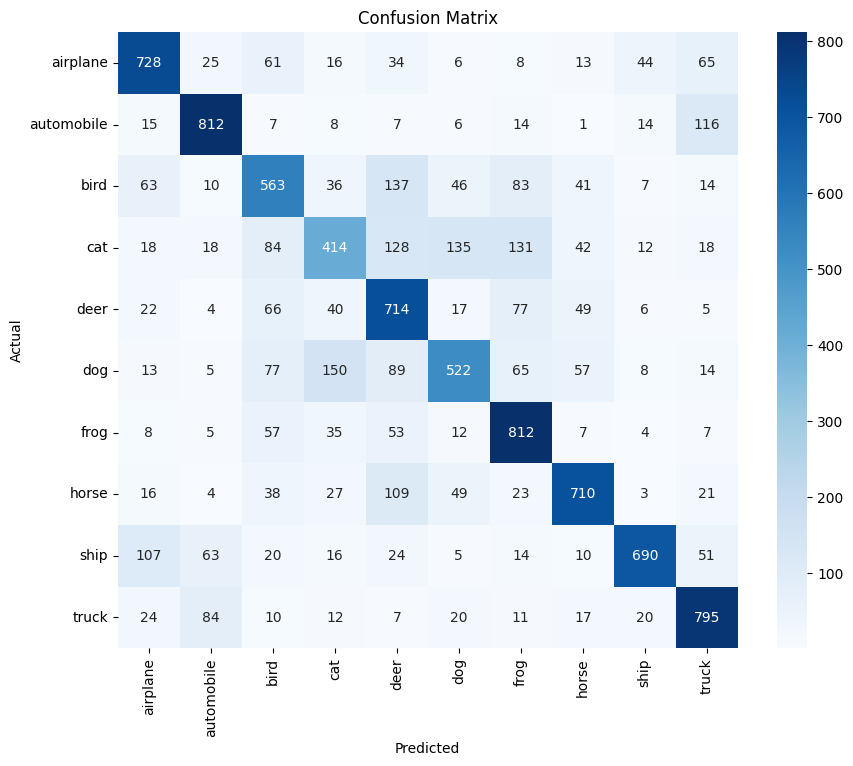

In [26]:
# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

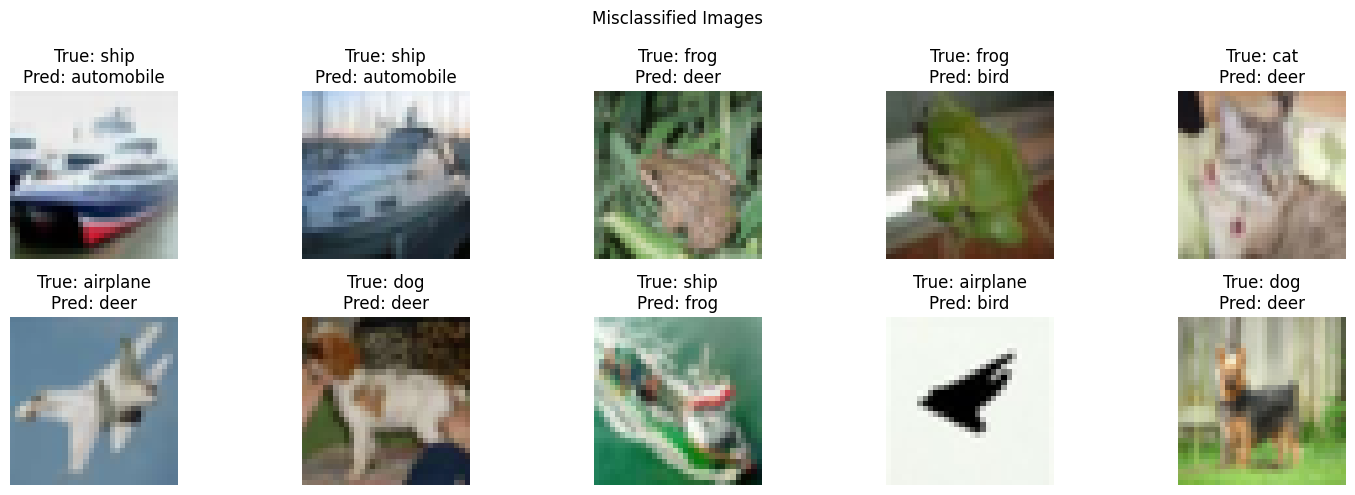

In [29]:
# Show some misclassified images
misclassified_indices = np.where(y_pred != y_true)[0][:10]
plt.figure(figsize=(15, 5))
for i, idx in enumerate(misclassified_indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {class_names[y_true[idx]]}\nPred: {class_names[y_pred[idx]]}")
    plt.axis('off')
plt.suptitle("Misclassified Images")
plt.tight_layout()
plt.show()